In [1]:
import pandas as pd
import networkx as nx
import connected as con

In [2]:
stockdf = pd.read_csv('../data/stock_market_data/stockdf.csv', index_col=0)
stockdf = stockdf.dropna(axis=1, how='all')
G = con.mst_and_relabel(stockdf)

calculating corr matrix
A has 1458 nan values


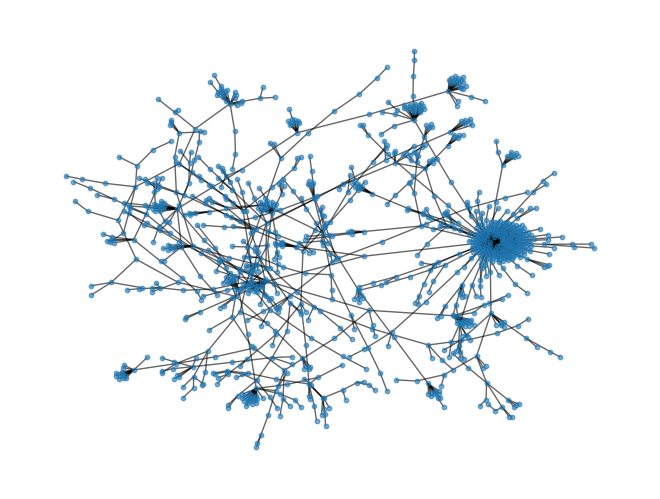

In [3]:
con.draw_mst(G)

In [4]:
con.find_max_degree(G)

('BSAC', 215)

calculating corr matrix
A has 1356 nan values


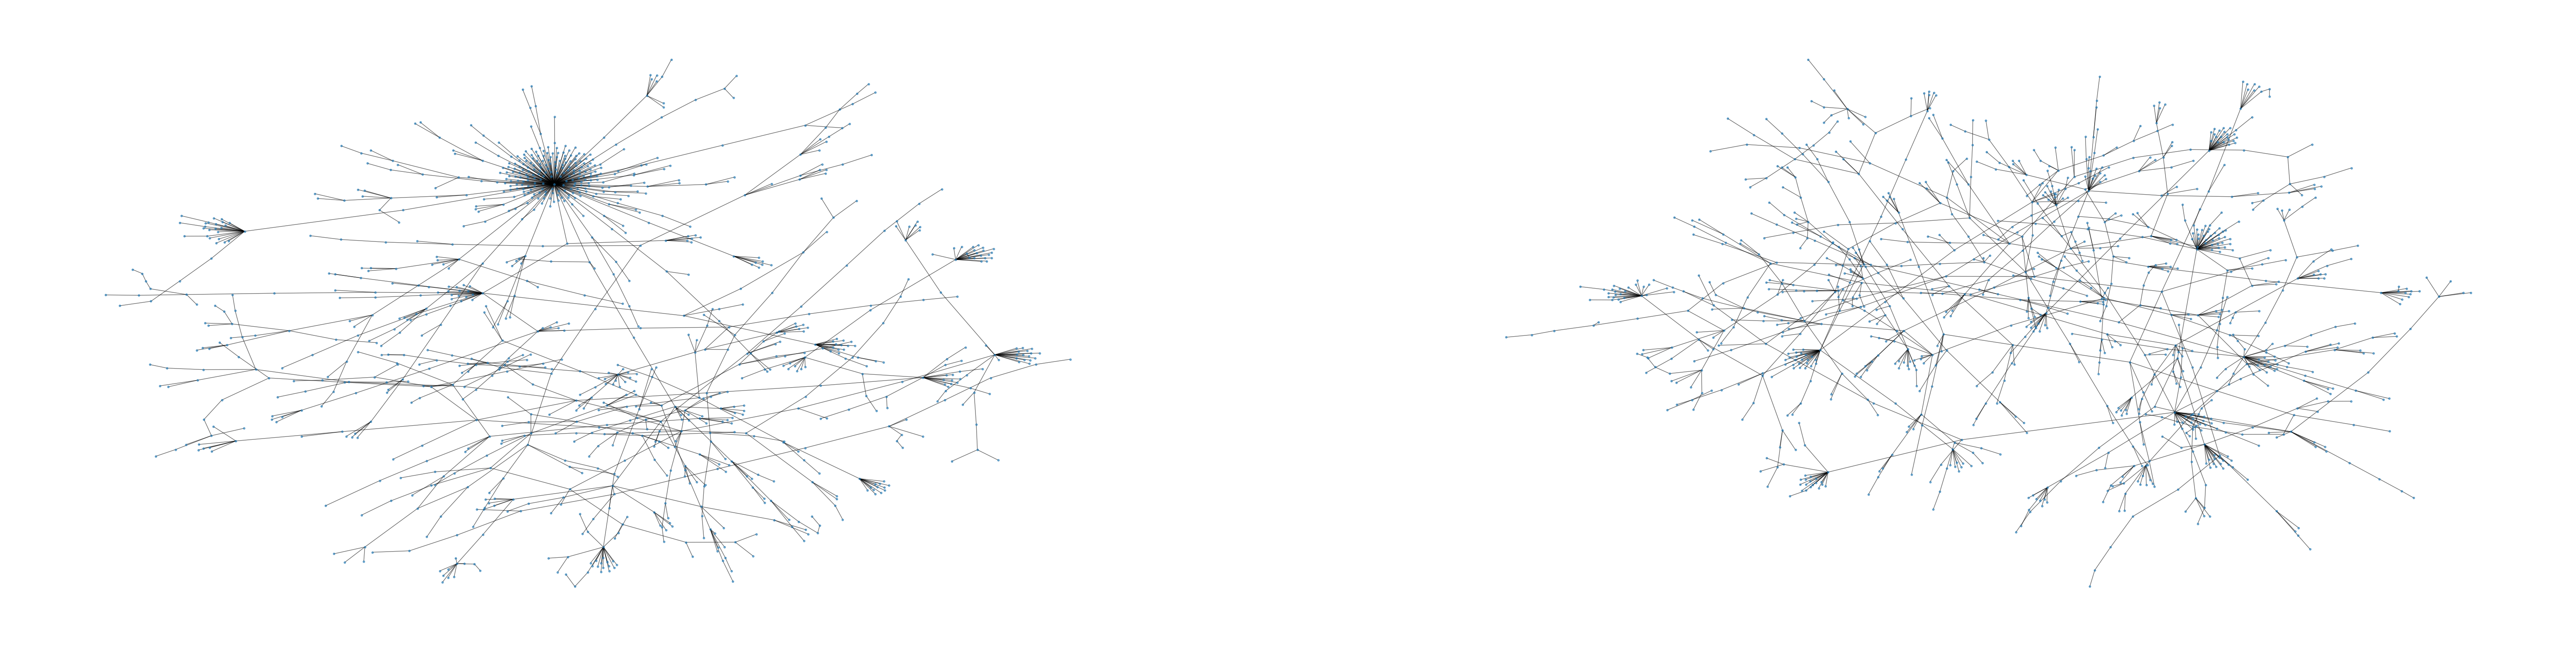

In [5]:
G_without_max_degree = con.mst_and_relabel(stockdf.drop(columns=['BSAC']))
con.draw_mst([G, G_without_max_degree])

calculating corr matrix
A has 1356 nan values


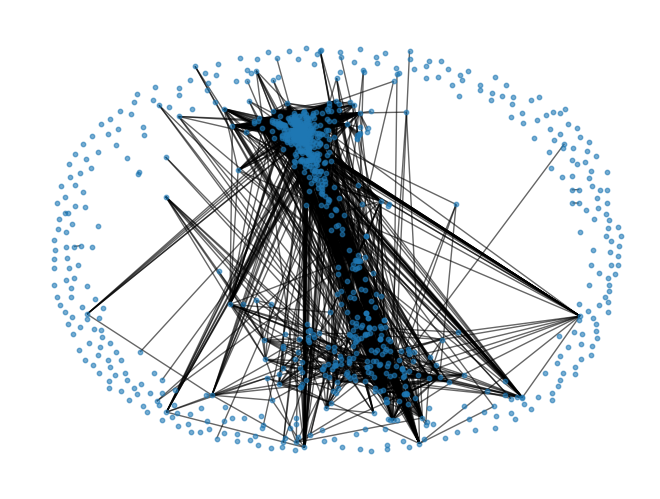

In [6]:
corr_net = con.create_corr_net(stockdf.drop(columns=['BSAC']), 0.9)
nx.draw(corr_net, with_labels=False, node_size=10, alpha=.6, width=1)

In [7]:
nx.find_cycle(corr_net)

[('A', 'ATONF'),
 ('ATONF', 'DGX'),
 ('DGX', 'FFIV'),
 ('FFIV', 'CCK'),
 ('CCK', 'A')]

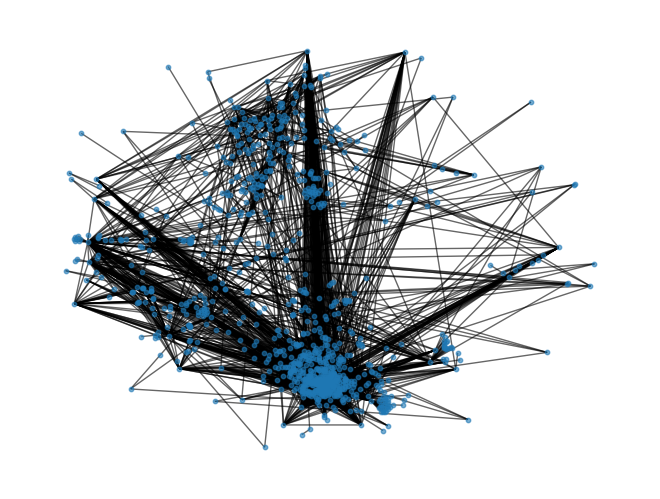

In [10]:
connected_mst = G_without_max_degree
main_tree = con.create_conected_net(connected_mst, corr_net)

nx.draw(main_tree, with_labels=False, node_size=10, alpha=.6, width=1)

In [11]:
nx.find_cycle(main_tree)

[('A', 'ATONF'),
 ('ATONF', 'DGX'),
 ('DGX', 'FFIV'),
 ('FFIV', 'CCK'),
 ('CCK', 'A')]